# Figure X.x : Training efficiency

Goals : 

- Show that 3D models are more efficient in terms of training data needed to reach a certain accuracy, compared to 2D models.
  
(Also shows slight advantage of 3D models in terms of accuracy, and performance of unsupervised model.)

In [6]:
from pathlib import Path
from tifffile import imread
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sys.path.append("../..")

from utils import *
from plots import *

In [7]:
SAVE_PLOTS_AS_PNG = False
SAVE_PLOTS_AS_SVG = False

## Data loading

In [8]:
image_folder = DATA_PATH / "RESULTS/SPLITS/Analysis"
c5 = imread(image_folder / "c5.tif")
c3 = imread(image_folder / "c3.tif")
visual = imread(image_folder / "visual.tif")

visual_slice = 50
# visual_slice = -1

gt_dict = {
    "visual": visual[:visual_slice,:,:],
    "c3": c3,
    "c5": c5,
}

In [9]:
visual_preds = {
    "cellpose": {
        "8020": image_folder / "c1_5/cp/iso_visual_c1-5_visual_8020.tif",
        # "8020": image_folder / "c1_5/cp_radius5/iso_visual_c1-5_visual_8020.tif",
        "6040": image_folder / "c1_5/cp/iso_visual_c1-5_visual_6040.tif",
        # "6040": image_folder / "c1_5/cp_radius5/iso_visual_c1-5_visual_6040.tif"
        "2080": image_folder / "c1_5/cp/iso_visual_c1-5_visual_2080.tif"
    },
    "stardist": {
        "8020": image_folder / "c1_5/sd/stardist_8020_labels.tif",
        "6040": image_folder / "c1_5/sd/stardist_6040_labels.tif",
        "2080": image_folder / "c1_5/sd/stardist_2080_labels.tif"
    },
    "segres": {
        "8020": image_folder / "c1_5/segres/c1_5_8020_SegRes.tif",
        "6040": image_folder / "c1_5/segres/c1_5_6040_SegRes.tif",
        "2080": image_folder / "c1_5/segres/c1_5_2080_SegRes.tif"
        
    },
    "swin": {
        "8020": image_folder / "c1_5/swin/c1-5_8020_Swin.tif",
        "6040": image_folder / "c1_5/swin/c1-5_6040_Swin.tif",
        "2080": image_folder / "c1_5/swin/c1-5_2080_Swin.tif",
    },
}
c3_preds = {
    "cellpose": {
        "8020": image_folder / "c1245_v/cp/c3image_c1245_v_8020.tif",
        "6040": image_folder / "c1245_v/cp/c3image_c1245_v_6040.tif",
        "2080": image_folder / "c1245_v/cp/c3image_c1245_v_2080.tif"
    },
    "stardist": {
        "8020": image_folder / "c1245_v/sd/stardist_8020_labels.tif",
        "6040": image_folder / "c1245_v/sd/stardist_6040_labels.tif",
        "2080": image_folder / "c1245_v/sd/stardist_2080_labels.tif"
    },
    "segres": {
        "8020": image_folder / "c1245_v/segres/c1245-v_8020_SegRes.tif",
        "6040": image_folder / "c1245_v/segres/c1245-v_6040_SegRes.tif",
        "2080": image_folder / "c1245_v/segres/c1245-v_2080_SegRes.tif"
    },
    "swin": {
        "8020": image_folder / "c1245_v/swin/c1245-v_8020_Swin.tif",
        "6040": image_folder / "c1245_v/swin/c1245-v_6040_Swin.tif",
        "2080": image_folder / "c1245_v/swin/c1245-v_2080_Swin.tif"
    },
}
c5_preds = {
    "cellpose": {
        "8020": image_folder / "c1-4_v/cp/c5image_c1-4_v_8020.tif",
        "6040": image_folder / "c1-4_v/cp/c5image_c1-4_v_6040.tif",
        "2080": image_folder / "c1-4_v/cp/c5image_c1-4_v_2080.tif"
    },
    "stardist": {
        "8020": image_folder / "c1-4_v/sd/stardist_8020_labels.tif",
        "6040": image_folder / "c1-4_v/sd/stardist_6040_labels.tif",
        "2080": image_folder / "c1-4_v/sd/stardist_2080_labels.tif"
    },
    "segres": {
        "8020": image_folder / "c1-4_v/segres/c1-4-v_8020_SegRes.tif",
        "6040": image_folder / "c1-4_v/segres/c1-4-v_6040_SegRes.tif",
        "2080": image_folder / "c1-4_v/segres/c1-4-v_2080_SegRes.tif"
    },
    "swin": {
        "8020": image_folder / "c1-4_v/swin/c1-4-v_8020_Swin.tif",
        "6040": image_folder / "c1-4_v/swin/c1-4-v_6040_Swin.tif",
        "2080": image_folder / "c1-4_v/swin/c1-4-v_2080_Swin.tif"
    },
}

In [10]:
cellpose_preds = {
    "2080": {
        "visual": imread(visual_preds["cellpose"]["2080"])[:visual_slice,:,:],
        "c3": imread(c3_preds["cellpose"]["2080"]),
        "c5": imread(c5_preds["cellpose"]["2080"]),
    },
    "6040": {
        "visual": imread(visual_preds["cellpose"]["6040"])[:visual_slice,:,:],
        "c3": imread(c3_preds["cellpose"]["6040"]),
        "c5": imread(c5_preds["cellpose"]["6040"]),
    },
    "8020": {
        "visual": imread(visual_preds["cellpose"]["8020"])[:visual_slice,:,:],
        "c3": imread(c3_preds["cellpose"]["8020"]),
        "c5": imread(c5_preds["cellpose"]["8020"]),
    },
}
stardist_preds = {
    "2080": {
        "visual": imread(visual_preds["stardist"]["2080"])[:visual_slice,:,:],
        "c3": imread(c3_preds["stardist"]["2080"]),
        "c5": imread(c5_preds["stardist"]["2080"]),
    },
    "6040": {
        "visual": imread(visual_preds["stardist"]["6040"])[:visual_slice,:,:],
        "c3": imread(c3_preds["stardist"]["6040"]),
        "c5": imread(c5_preds["stardist"]["6040"]),
    },
    "8020": {
        "visual": imread(visual_preds["stardist"]["8020"])[:visual_slice,:,:],
        "c3": imread(c3_preds["stardist"]["8020"]),
        "c5": imread(c5_preds["stardist"]["8020"]),
    },
}
segres_preds = {
    "2080": {
        "visual": imread(visual_preds["segres"]["2080"])[:visual_slice,:,:],
        "c3": imread(c3_preds["segres"]["2080"]),
        "c5": imread(c5_preds["segres"]["2080"]),
    },
    "6040": {
        "visual": imread(visual_preds["segres"]["6040"])[:visual_slice,:,:],
        "c3": imread(c3_preds["segres"]["6040"]),
        "c5": imread(c5_preds["segres"]["6040"]),
    },
    "8020": {
        "visual": imread(visual_preds["segres"]["8020"])[:visual_slice,:,:],
        "c3": imread(c3_preds["segres"]["8020"]),
        "c5": imread(c5_preds["segres"]["8020"]),
    },
}
swin_preds = {
    "2080": {
        "visual": imread(visual_preds["swin"]["2080"])[:visual_slice,:,:],
        "c3": imread(c3_preds["swin"]["2080"]),
        "c5": imread(c5_preds["swin"]["2080"]),
    },
    "6040": {
        "visual": imread(visual_preds["swin"]["6040"])[:visual_slice,:,:],
        "c3": imread(c3_preds["swin"]["6040"]),
        "c5": imread(c5_preds["swin"]["6040"]),
    },
    "8020": {
        "visual": imread(visual_preds["swin"]["8020"])[:visual_slice,:,:],
        "c3": imread(c3_preds["swin"]["8020"]),
        "c5": imread(c5_preds["swin"]["8020"]),
    },
}
wnet_preds = {
    "2080": {
        "visual": imread(image_folder / "WNet/visual_pred.tif")[:visual_slice,:,:],
        "c3": imread(image_folder / "WNet/c3_pred.tif"),
        "c5": imread(image_folder / "WNet/c5_pred.tif"),
    },
    "6040": {
        "visual": imread(image_folder / "WNet/visual_pred.tif")[:visual_slice,:,:],
        "c3": imread(image_folder / "WNet/c3_pred.tif"),
        "c5": imread(image_folder / "WNet/c5_pred.tif"),
    },
    "8020": {
        "visual": imread(image_folder / "WNet/visual_pred.tif")[:visual_slice,:,:],
        "c3": imread(image_folder / "WNet/c3_pred.tif"),
        "c5": imread(image_folder / "WNet/c5_pred.tif"),
    },
}

## Dice computation

In [11]:
def model_dices_across_splits(model_dict):
    model_dices = {
        "2080": [],
        "6040": [],
        "8020": [],
    }
    for split in model_dict:
        for image in model_dict[split]:
            print(f"Split: {split}, Image: {image}")
            print(f"Image shape: {model_dict[split][image].shape}")
            print(f"GT shape: {gt_dict[image].shape}")
            gt = gt_dict[image]
            pred = model_dict[split][image]
            gt = np.where(gt > 0, 1, 0)
            pred = np.where(pred > 0, 1, 0)
            dice = dice_coeff(gt, pred)
            print(f"Dice: {dice}")
            model_dices[split].append(dice)
    return model_dices

In [12]:
cellpose_dices = model_dices_across_splits(cellpose_preds)

Split: 2080, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.3897810218978102
Split: 2080, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.41333207922388543
Split: 2080, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.4346342300432785
Split: 6040, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.32975496609967886
Split: 6040, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.46105638941004795
Split: 6040, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.28778826871657753
Split: 8020, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.5462526711464689
Split: 8020, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.3586485504207554
Split: 8020, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.4212584018642991


In [13]:
stardist_dices = model_dices_across_splits(stardist_preds)

Split: 2080, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.7000729374140882
Split: 2080, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 1.7072712683318253e-05
Split: 2080, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 2.441108263151471e-05
Split: 6040, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.6547947996383686
Split: 6040, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.5219389414443077
Split: 6040, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.725773126793911
Split: 8020, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.6696363730677456
Split: 8020, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.5228543567663311
Split: 8020, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.6306411323896752


In [14]:
segres_dices = model_dices_across_splits(segres_preds)

Split: 2080, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.7818412571180469
Split: 2080, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.690604379266495
Split: 2080, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.8011690505093154
Split: 6040, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.7482627642659443
Split: 6040, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)


Dice: 0.8407463430415053
Split: 6040, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.6176906743958748
Split: 8020, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.7742763592762825
Split: 8020, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.7732059262568924
Split: 8020, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.6349198430120402


In [15]:
swin_dices = model_dices_across_splits(swin_preds)

Split: 2080, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.825505078870934
Split: 2080, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.8358747923406488
Split: 2080, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.8351299684040039
Split: 6040, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.834037286603933
Split: 6040, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.848574773573554
Split: 6040, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.8382282793867121
Split: 8020, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.843205100791167
Split: 8020, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.8399061788580495
Split: 8020, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.8205994504570179


In [16]:
wnet_dices = model_dices_across_splits(wnet_preds)

Split: 2080, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.8179572126452918
Split: 2080, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.8113536341409202
Split: 2080, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.8087545264446371
Split: 6040, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.8179572126452918
Split: 6040, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.8113536341409202
Split: 6040, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.8087545264446371
Split: 8020, Image: visual
Image shape: (50, 127, 214)
GT shape: (50, 127, 214)
Dice: 0.8179572126452918
Split: 8020, Image: c3
Image shape: (149, 105, 147)
GT shape: (149, 105, 147)
Dice: 0.8113536341409202
Split: 8020, Image: c5
Image shape: (124, 86, 94)
GT shape: (124, 86, 94)
Dice: 0.8087545264446371


In [17]:
model_names = ["Cellpose", "Stardist", "SegResNet", "SwinUNetR", "WNet (all data)"]
models = [cellpose_dices, stardist_dices, segres_dices, swin_dices]
wnet_means = [np.mean(wnet_dices["8020"]), np.mean(wnet_dices["6040"]), np.mean(wnet_dices["2080"])]

plt.rcParams["figure.figsize"] = (8, 8)

In [18]:
# creata a dataframe with each model dice, adding the split as a categorical variable
dices_df = pd.DataFrame(columns=["Model", "Dice", "Split"])
dices_df["Model"] = ["Stardist"] * 9 + ["Cellpose"] * 9 + ["SegResNet"] * 9 + ["SwinUNetR"] * 9 + ["WNet"] * 3
dices_df["Dice"] = stardist_dices["2080"] + stardist_dices["6040"] + stardist_dices["8020"] + cellpose_dices["2080"] + cellpose_dices["6040"] + cellpose_dices["8020"] + segres_dices["2080"] + segres_dices["6040"] + segres_dices["8020"] + swin_dices["2080"] + swin_dices["6040"] + swin_dices["8020"] + wnet_dices["2080"]
dices_df["Split"] = ["20/80"] * 3 + ["60/40"] * 3 + ["80/20"] * 3 + ["20/80"] * 3 + ["60/40"] * 3 + ["80/20"] * 3 + ["20/80"] * 3 + ["60/40"] * 3 + ["80/20"] * 3 + ["20/80"] * 3 + ["60/40"] * 3 + ["80/20"] * 3 + ["All data"] * 3

In [19]:
dices_df

,Model,Dice,Split
0,Stardist,0.700073,20/80
1,Stardist,0.000017,20/80
2,Stardist,0.000024,20/80
3,Stardist,0.654795,60/40
4,Stardist,0.521939,60/40
5,Stardist,0.725773,60/40
6,Stardist,0.669636,80/20
7,Stardist,0.522854,80/20
8,Stardist,0.630641,80/20
9,Cellpose,0.389781,20/80


## Plots

C:\Users\Cyril\AppData\Local\Temp\ipykernel_13764\2722884362.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=dices_df, x="Model", y="Dice", hue="Split", ax=ax, palette=COLORMAP)


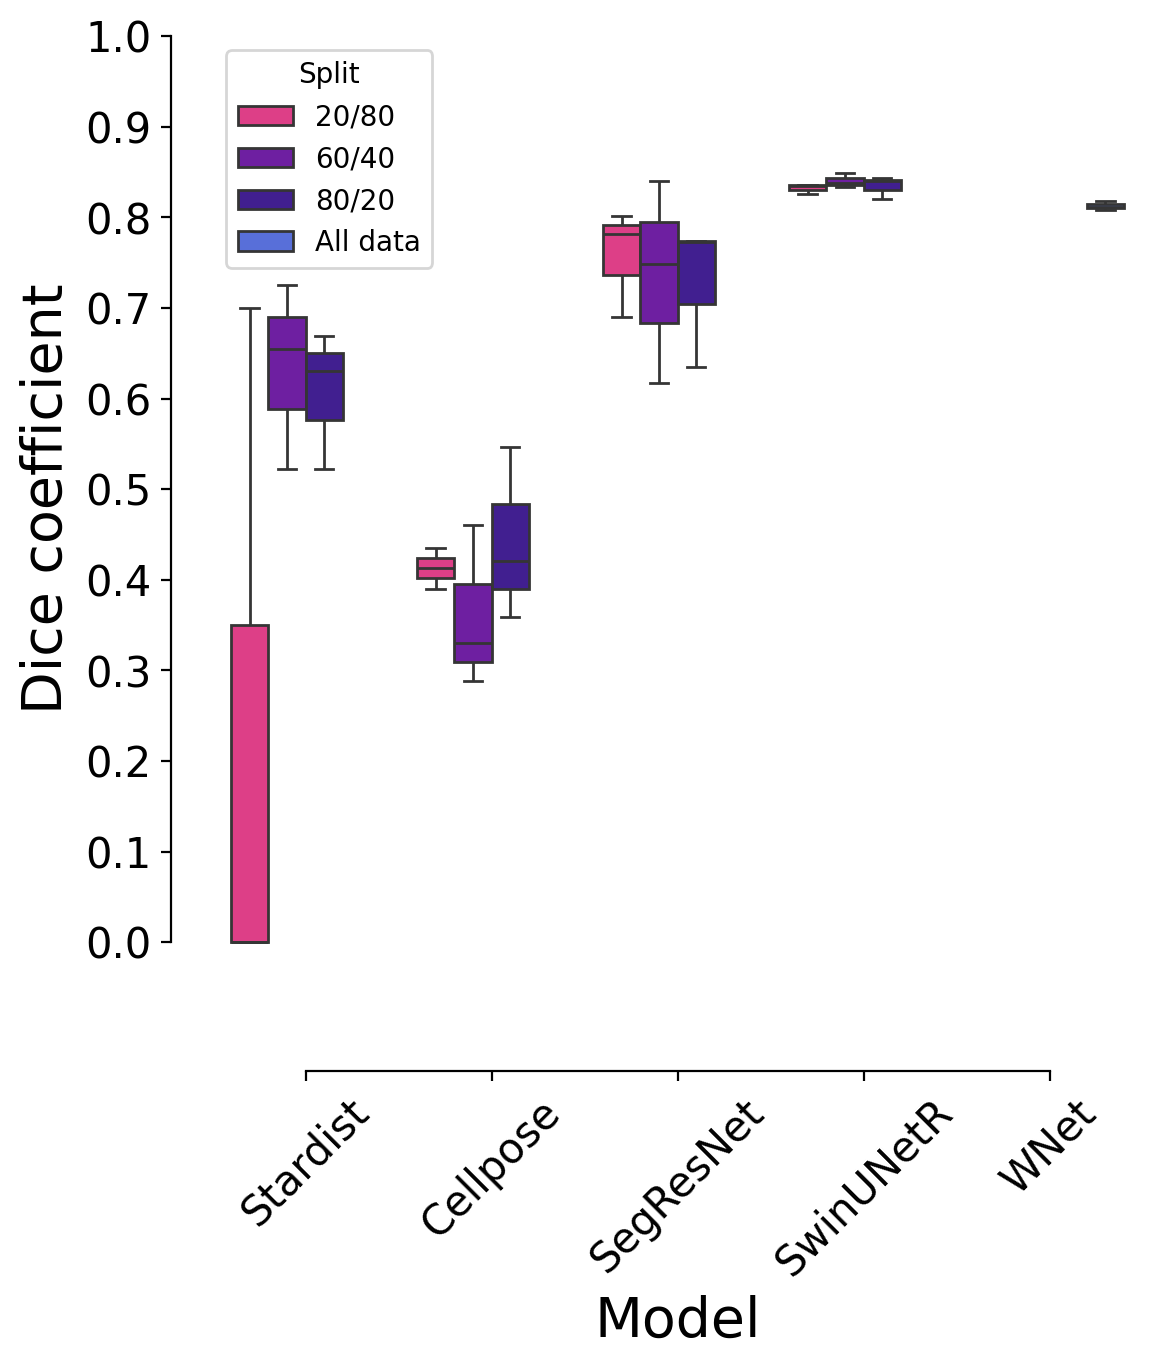

In [27]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=DPI)
sns.boxplot(data=dices_df, x="Model", y="Dice", hue="Split", ax=ax, palette=COLORMAP)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.tick_params(axis = 'x',   rotation = 45)
plt.ylim([-0.02,1])
ax.set_yticks(np.arange(0,1.1,0.1))
sns.despine(
    left=False,
    right=True,
    bottom=False,
    top=True,
    trim=True,
    offset={"bottom": 40, "left": 15},
)
plt.xlabel("Model", fontsize=20)
plt.ylabel("Dice coefficient", fontsize=20)
plt.show()

if SAVE_PLOTS_AS_PNG:
    fig.savefig("SPLITS_FIGURE.png")
if SAVE_PLOTS_AS_SVG:
    fig.savefig("SPLITS_FIGURE.svg")

C:\Users\Cyril\AppData\Local\Temp\ipykernel_13764\809577737.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=dices_df.iloc[27:,:], x="Model", y="Dice", hue="Split", ax=ax, palette=COLORMAP, dodge=True)


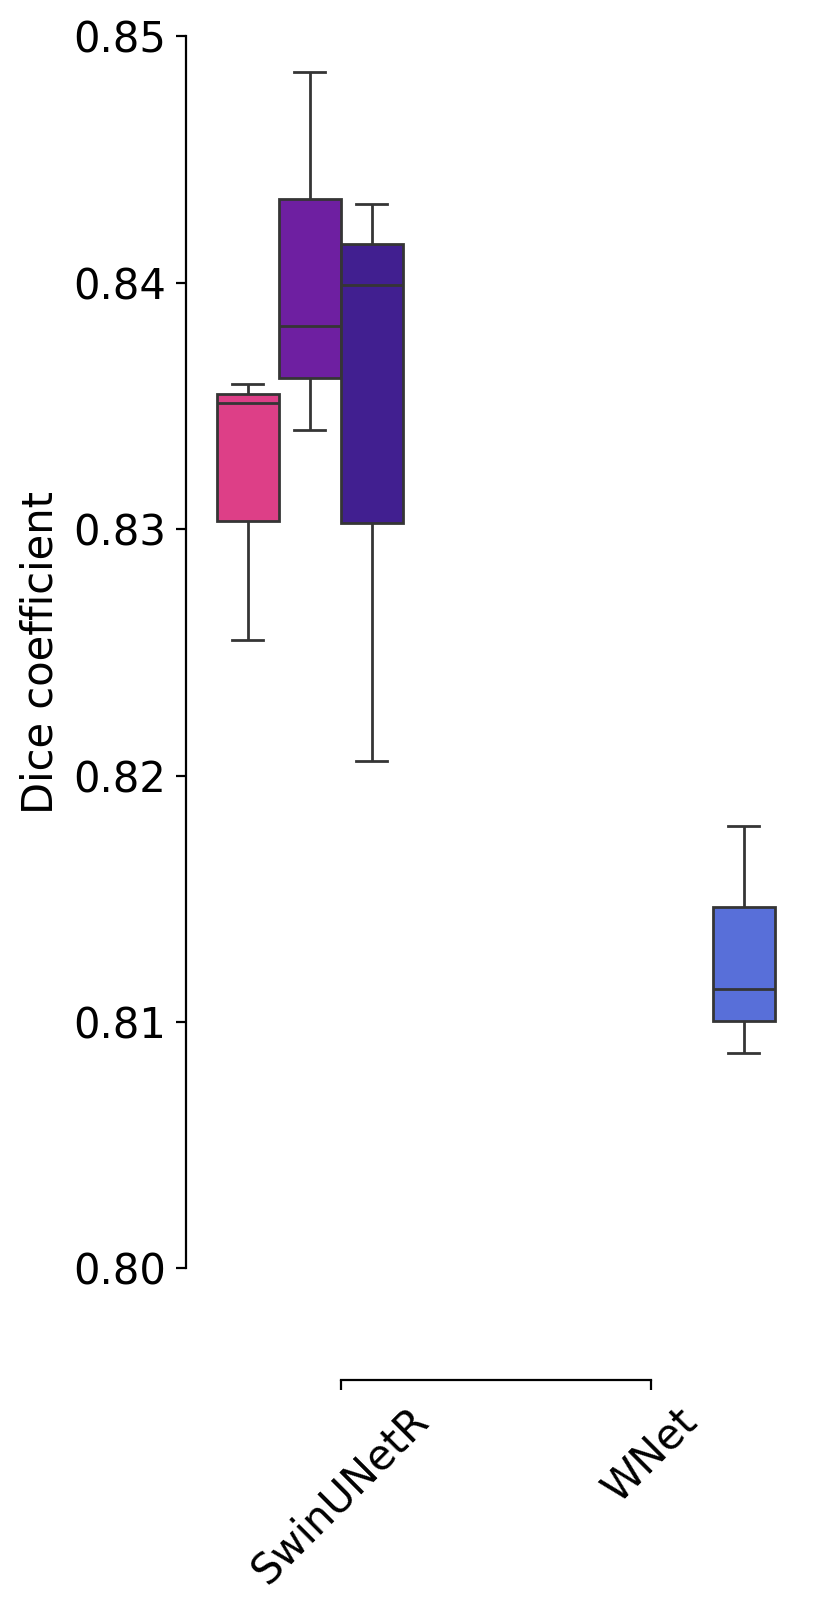

In [21]:
# same as above with Swin and WNet and y axis on the right
fig, ax = plt.subplots(figsize=(4, 8), dpi=DPI)
sns.boxplot(data=dices_df.iloc[27:,:], x="Model", y="Dice", hue="Split", ax=ax, palette=COLORMAP, dodge=True)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.tick_params(axis = 'x',   rotation = 45)
ax.set_ylim([0.8,0.85])
ax.set_yticks(np.arange(0.8,0.86,0.01))
plt.xlabel("", fontsize=20)
plt.ylabel("Dice coefficient", fontsize=15)
ax.legend_.remove()
sns.despine(
    left=False,
    right=True,
    bottom=False,
    top=True,
    trim=True,
    offset={"bottom": 40, "right": 15},
)

if SAVE_PLOTS_AS_PNG:
    fig.savefig("SPLITS_FIGURE_SWIN_WNET_zoom.png")
if SAVE_PLOTS_AS_SVG:
    fig.savefig("SPLITS_FIGURE_SWIN_WNET_zoom.svg")

In [22]:
# plt.figure(figsize=(1,3), dpi=200)
# ax = plt.gca()

# ax.plot(
#     [0],
#     wnet_means[0], 
#     label=model_names[-1], 
#     color=l[-1].get_color(),
#         ) 

# c = ax.errorbar(
#         0, 
#         wnet_means[0], 
#         yerr=[np.std(wnet_dices["2080"])],
#         fmt='+', 
#         alpha=0.8,
#         markersize=5,
#         linewidth=0,
#         capsize=20,
#         color=l[0].get_color(),
#         dash_capstyle="round",
#         )
# ax.fill_between(
#         [-0.03,0.03],
#         np.max(wnet_means[0]) - np.std(wnet_dices["2080"]),
#         np.min(wnet_means[0]) + np.std(wnet_dices["2080"]),
#         alpha=0.6,
#         color=l[0].get_color(),
#         )
# set_marker_errorbar(c)
# ax.set_ylim([0.808,0.82])
# ax.set_xlim([-0.2,0.2])
# plt.tick_params(
#     axis='x',         
#     which='both',      
#     bottom=False,      
#     top=False,         
#     labelbottom=False) 

# plt.xlabel("WNet")
# plt.ylabel("Dice coefficient")

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# sns.despine(trim=True)   
# plt.show()

In [23]:
# plot dices for each model with split on x axis
# plot as confidence interval with min, max, middle values

# for i, model in enumerate(models):
#     max_dices = []
#     min_dices = []
#     middle_dices = []
#     for split in model:
#         dices = sorted(model[split])
#         max_dices.append(dices[-1])
#         min_dices.append(dices[0])
#         middle_dices.append(dices[1])
#     plt.plot(middle_dices, label=model_names[i])
#     # fill between according to std
#     plt.fill_between(range(len(middle_dices)), min_dices, max_dices, alpha=0.2)

# # plt.hlines(wnet_means, 0, 1, label="wnet", linestyles="dashed", colors="purple")       
# plt.legend()
# # set xticks to be split names
# plt.xticks([0,1,2], ["20/80","60/40","80/20"])
# plt.xlabel("Split")
# plt.ylabel("Dice coefficient")
# plt.title("Dice coefficient for each model and split")
# # plt.xlim(-0.2, 1.2)
# plt.show()

In [24]:
# # plot dices for each model with split on x axis
# # plot as confidence interval with min, max, middle values
# for i, model in enumerate(models):
#     max_dices = []
#     min_dices = []
#     middle_dices = []
#     for split in model:
#         dices = sorted(model[split])
#         max_dices.append(dices[-1])
#         min_dices.append(dices[0])
#         middle_dices.append(dices[1])
#     plt.plot(middle_dices, label=model_names[i])
#     # show error bars with min and max with same color as line and 0.2 alpha
#     plt.errorbar(range(len(middle_dices)), middle_dices, yerr=[np.array(middle_dices) - np.array(min_dices), np.array(max_dices) - np.array(middle_dices)], fmt='o', color=plt.gca().lines[-1].get_color(), alpha=0.7)
#     plt.fill_between(range(len(middle_dices)), min_dices, max_dices, alpha=0.2)
# # plt.plot(wnet_means, label="wnet")
# plt.hlines(wnet_means, 0, 2, label="wnet", linestyles="dashed", colors="purple")   
# plt.legend()
# # set xticks to be split names
# plt.xticks([0,1,2], ["20/80","60/40","80/20"])
# plt.xlabel("Split")
# plt.ylabel("Dice coefficient")
# plt.title("Dice coefficient for each model and split")
# # plt.xlim(-0.2, 1.2)
# plt.yticks(np.arange(0, 1.1, 0.1))
# plt.show()

In [25]:
# def set_marker_errorbar(c):
#     for i, mark in enumerate([6, 7]):
#         c.lines[1][i].set_marker(mark)
#         c.lines[1][i].set_markersize(5)
#         c.lines[1][i].set_markerfacecolor("None")

# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors) # change deafault cycler to use Set1
# plt.figure(figsize=(6,6), dpi=200)
# ax = plt.gca()

# for i, model in enumerate(models):
#     mean_dices = []
#     std_dices = []
#     for split in model:
#         dices = sorted(model[split])
#         mean_dices.append(np.mean(dices))
#         std_dices.append(np.std(dices))
#     l=ax.plot(mean_dices, label=model_names[i], linewidth=2, alpha=0.8)
#     ax.fill_between(
#         range(len(mean_dices)),
#         (np.array(mean_dices) - np.array(std_dices)),
#         np.array(mean_dices) + np.array(std_dices),
#         alpha=0.6,
#         color=l[0].get_color(),
#         )
#     [lin.set_linewidth(0) for lin in l]
#     c = ax.errorbar(
#         range(len(mean_dices)), 
#         mean_dices, 
#         yerr=std_dices,
#         fmt='+', 
#         alpha=0.6,
#         markersize=5,
#         linewidth=0,
#         capsize=20,
#         color=l[0].get_color(),
#         dash_capstyle="round",
#         )
#     set_marker_errorbar(c)
# l = ax.plot(
#     wnet_means, 
#     label=model_names[-1], 
#     # linestyle="--"
#         )
# [lin.set_linewidth(0) for lin in l]
# ax.errorbar(
#     range(len(wnet_means)), 
#     wnet_means, 
#     fmt='+', 
#     alpha=0.6,
#     markersize=5,
#     linewidth=2,
#     capsize=20,
#     color=l[0].get_color(),
#     dash_capstyle="round",
#     )
# ax.set_ylim([-0.2,1])
# plt.yticks(np.arange(0,1.1,0.1))
# plt.xticks([0,1,2], ["20/80","60/40","80/20"])
# leg = ax.legend(
#     loc="best",
#     title="Model",
#     frameon=False,
#     ncol=3,
#     # nrow=4,
#     handlelength=1,
#     markerscale=0.0,
#     labelspacing=0.5,
#     columnspacing=0.5,
#     handletextpad=0.3,
#     fontsize="small",
#     title_fontsize="small",
# )   
# for legobj in leg.legend_handles:
#     legobj.set_linewidth(2.0)
# plt.xlabel("Split (training/validation)")
# plt.ylabel("Dice coefficient")
# plt.title("Dice coefficient for each model and split")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# sns.despine(trim=True)   
# plt.show()